In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

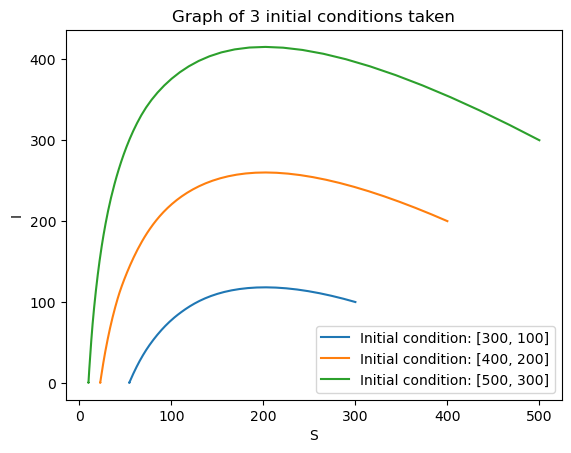

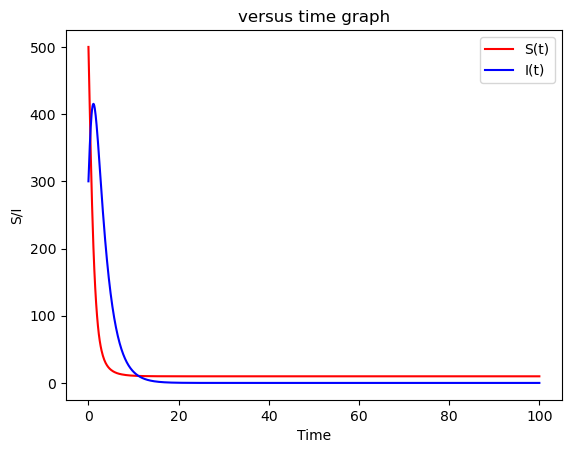

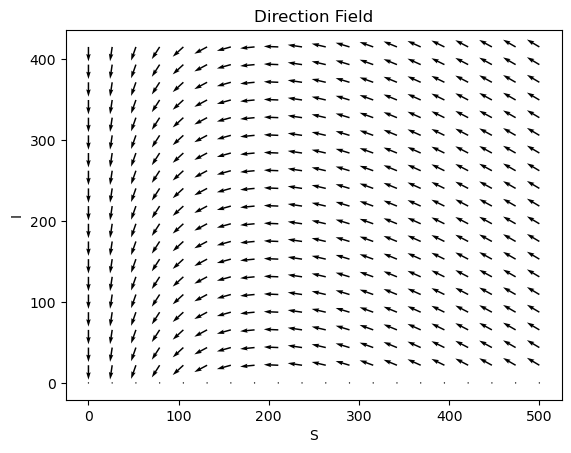

In [2]:
#Define the given system in the form of lambdify generated function
func_arr = lambda t, y: [(-(beta) * y[0] * y[1]), (beta) * y[0] * y[1] - (gamma) * y[1]]
beta = 2.18e-3
gamma = 0.44

#Input the interval of integration
t_interval = [0,100]

#Create an array for various initial conditions
IC = [[300, 100], [400, 200], [500, 300]]


#Define the discrete-time space
t_space = np.linspace(t_interval[0], t_interval[1], 1000)

#iterating over all initial conditions
for ic in IC:
    solutions_arr = solve_ivp(func_arr, t_interval , ic, method="RK45", t_eval=t_space)
    plt.plot(solutions_arr.y[0], solutions_arr.y[1], label=f'Initial condition: {ic}') #plotting each Initial condition
    plt.xlabel('S')
    plt.ylabel('I')
    plt.legend()
    plt.title('Graph of 3 initial conditions taken')


fig,ax1=plt.subplots()
ax1.plot(solutions_arr.t,solutions_arr.y[0],color="red",label="S(t)")
ax1.plot(solutions_arr.t,solutions_arr.y[1],color="blue",label="I(t)")
plt.ylabel('S/I')
plt.xlabel('Time')
ax1.legend()
plt.title('versus time graph')

# Find the maximum value of the plotted trajectories in Step6 over the x-axis and y-axis
maxX = max(solutions_arr.y[0])
maxY = max(solutions_arr.y[1])

#Create a discrete space for x and y upto the obtained maximum values in Step8
x_space = np.linspace(0, maxX, 20)
y_space = np.linspace(0, maxY, 20)

# Create a meshgrid using the discrete spaces obtained in Step9
X, Y = np.meshgrid(x_space, y_space)

# Find the slopes of functions using defined function in Step7 over the values of meshgrid obtained in Step10
Vals_dS = -(beta) * X * Y
Vals_dI = (beta) * X * Y - (gamma) * Y


# Normalize the obtained slope points
norm = np.sqrt(Vals_dS**2 + Vals_dI**2) + 1e-100
Norm_dS = Vals_dS / norm
Norm_dI = Vals_dI / norm


# Plot the direction field as an arrows from the point in meshgrid to the obtained slope points
plt.figure()
plt.quiver(X, Y, Norm_dS, Norm_dI)
plt.xlabel('S')
plt.ylabel('I')
plt.title('Direction Field')
plt.show()

In [ ]:
from sympy import symbols, Function, dsolve

# Define the variable
t = symbols('t')

# Define the function
y = Function('y')(t)

# Define the differential equation
diff_eq = y.diff(t, t, t, t) + 8*y.diff(t, t) + 16*y

# Solve the differential equation
solution = dsolve(diff_eq, y)
print(solution)

In [ ]:
def euler(f, tk, yk, h, beta, gamma):
    return (yk + h * np.array(f(tk, yk, beta, gamma))) #euler method which returns the value at that point/x(k+1)

def rk2(f, tk, yk, h, beta, gamma):
    k1 = h * np.array(f(tk, yk, beta, gamma))
    k2 = h * np.array(f(tk + h / 2, yk + k1 / 2, beta, gamma))
    return (yk + k2)   #rk2 method which returns the value at that point/x(k+1)

def rk4(f, tk, yk, h, beta, gamma):
    k1 = h * np.array(f(tk, yk, beta, gamma))
    k2 = h * np.array(f(tk + h / 2, yk + k1 / 2, beta, gamma))
    k3 = h * np.array(f(tk + h / 2, yk + k2 / 2, beta, gamma))
    k4 = h * np.array(f(tk + h, yk + k3, beta, gamma))
    return (yk + (k1/6 +  k2/3 + k3/3 + k4/6)) #rk4 method which returns the value at that point/x(k+1)

def equations(t, y, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I 
    return [dSdt, dIdt, dRdt] #defining the diff.Equations as function

beta = 2.18e-3
gamma = 0.44
initial_conditions = [762, 800, 0]
tspan = [0, 10.5]
h = 0.7


t = np.arange(tspan[0], tspan[1] + h, h)

y_euler = np.zeros((len(t), len(initial_conditions)))
y_euler[0] = initial_conditions

y_rk2 = np.zeros((len(t), len(initial_conditions)))
y_rk2[0] = initial_conditions

y_rk4 = np.zeros((len(t), len(initial_conditions)))
y_rk4[0] = initial_conditions

for n in range(len(t) - 1):  #calling each functions defined above
    y_euler[n + 1] = euler(equations, t[n], y_euler[n], h, beta, gamma)
    y_rk2[n + 1] = rk2(equations, t[n], y_rk2[n], h, beta, gamma)
    y_rk4[n + 1] = rk4(equations, t[n], y_rk4[n], h, beta, gamma)

#lambdify
lamb_eq = lambda t, y: equations(t, y, beta, gamma)

#discrete space for eval
t_space = np.arange(tspan[0], tspan[1] + h, h)

# solve_ivp with RK45 method for ode45 solution
sol = solve_ivp(lamb_eq, tspan, initial_conditions, method='RK45', t_eval=t_space)

print("euler/rk1 Method:")
print(y_euler)
print("\nrk2 Method:")
print(y_rk2)
print("\nrk4 Method:")
print(y_rk4)
print("\nsolve_ivp (ode45) Method:")
print(sol.y)

In [ ]:
'''
selected_indices = [50, 200, 400, 600, 800]

plt.scatter(time_span[selected_indices], solution1[selected_indices, 0], marker='o', label='S(t) points')
plt.scatter(time_span[selected_indices], solution1[selected_indices, 1], marker='o', label='I(t) points')
plt.scatter(time_span[selected_indices], solution1[selected_indices, 2], marker='o', label='R(t) points')

plt.scatter(time_span[selected_indices], solution2[selected_indices, 0], color='red', marker='o', label='S(t) points')
plt.scatter(time_span[selected_indices], solution2[selected_indices, 1], color='blue', marker='o', label='I(t) points')
plt.scatter(time_span[selected_indices], solution2[selected_indices, 2], color='green', marker='o', label='R(t) points')
'''

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(sol.t, sol.y[0], label='solve_ivp - Susceptible (S)', linestyle='--')
plt.plot(t, y_rk4[:, 0], label='RK4 - Susceptible (S)', linestyle='-.')
plt.plot(t, y_euler[:, 0], label='Euler - Susceptible (S)')
plt.plot(t, y_rk2[:, 0], label='RK2 - Susceptible (S)',linestyle=':', linewidth ='3')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Susceptible')
plt.legend()

plt.figure(figsize=(6,6))

plt.plot(t, y_rk2[:, 1], label='RK2 - Infectious (I)',linestyle=':', linewidth ='3')
plt.plot(t, y_euler[:, 1], label='Euler - Infectious (I)')
plt.plot(sol.t, sol.y[1], label='solve_ivp - Infectious (I)', linestyle='--')
plt.plot(t, y_rk4[:, 1], label='RK4 - Infectious (I)', linestyle='-.')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Infectious')
plt.legend()

plt.figure(figsize=(6,6))
plt.plot(t, y_euler[:, 2], label='Euler - Recovered (R)')
plt.plot(t, y_rk4[:, 2], label='RK4 - Recovered (R)', linestyle='-.')
plt.plot(t, y_rk2[:, 2], label='RK2 - Recovered (R)',linestyle=':', linewidth ='3')
plt.plot(sol.t, sol.y[2], label='solve_ivp - Recovered (R)', linestyle='--')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Recovered')
plt.grid(True)
plt.show()

In [ ]:
from sympy import symbols, Function, Eq, dsolve
t, gamma = symbols('t gamma')
S = Function('S')(t)
I = Function('I')(t)
R = Function('R')(t)

eq1 = Eq(S.diff(t), 0)
eq2 = Eq(I.diff(t), - gamma * I)
eq3 = Eq(R.diff(t), gamma * I)

sol = dsolve([eq1,
              eq2,
              eq3])

print("Analytical Solution:")
print(sol)

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

t = sp.Symbol("t")
S = sp.Function("S")
I = sp.Function("I")
R = sp.Function("R")
g = 0.44
b = 0

ode1 = S(t).diff(t) + b * S(t) * I(t)
ode2 = I(t).diff(t) - b * S(t) * I(t) + g * I(t)
ode3 = R(t).diff(t) - g * I(t)
eq_sys = [sp.Eq(ode1, 0), sp.Eq(ode2, 0), sp.Eq(ode3, 0)]

par_sys_sol = sp.dsolve(eq_sys, [S(t), I(t), R(t)], ics={S(0): 762, I(0): 800, R(0): 0})
print(par_sys_sol)

part_sol_S = sp.lambdify(t, (par_sys_sol[0].rhs) * (t**0.00000001), modules="numpy")
part_sol_I = sp.lambdify(t, par_sys_sol[1].rhs, modules="numpy")
part_sol_R = sp.lambdify(t, par_sys_sol[2].rhs, modules="numpy")

time = np.linspace(0, 15, 10000)

fig, ax = plt.subplots(1, 1)
ax.set_xlim(0, 16)
ax.set_ylim(0, 1000)
ax.set_xlabel("t")

ax.plot(time, part_sol_S(time), color="red", label="S(t) vs t (analytical method)")
ax.plot(time, part_sol_I(time), color="blue", label="I(t) vs t (analytical method)")
ax.plot(time, part_sol_R(time), color="green", label="R(t) vs t (analytical method)")

def rk2_sys(f, time, initial, h):
    points = np.arange(time[0], time[1] + 0.000001, h)
    n = len(points)
    sol = np.zeros((len(initial), n))
    sol[0, 0] = initial[0]
    sol[1, 0] = initial[1]
    sol[2, 0] = initial[2]
    for i in range(1, n):
        values = {t: points[i - 1], S: sol[0, i - 1], I: sol[1, i - 1], R: sol[2, i - 1]}
        k1 = f.subs(values)[0]
        k1_ = f.subs(values)[1]
        k1__ = f.subs(values)[2]
        k2 = f.subs({t: points[i - 1] + h, S: sol[0, i - 1] + h * k1, I: sol[1, i - 1] + h * k1})[0]
        k2_ = f.subs({t: points[i - 1] + h, S: sol[0, i - 1] + h * k1_, I: sol[1, i - 1] + h * k1_})[1]
        k2__ = f.subs({t: points[i - 1] + h, S: sol[0, i - 1] + h * k1_, I: sol[1, i - 1] + h * k1_})[2]

        sol[0, i] = sol[0, i - 1] + h * (1 / 2) * (k1 + k2)
        sol[1, i] = sol[1, i - 1] + h * (1 / 2) * (k1_ + k2_)
        sol[2, i] = sol[2, i - 1] + h * (1 / 2) * (k1__ + k2__)

    return sol, points

S = sp.Symbol("S")
I = sp.Symbol("I")
R = sp.Symbol("R")
t = sp.Symbol("t")

f = sp.Matrix([-0.00005 * S * I, (0.00005* S * I - g * I), g * I])
time1 = [0, 15]
initial = [762, 800, 0]
h = 0.05

rk2_soln, points = rk2_sys(f, time1, initial, h)
ax.plot(points, rk2_soln[0], ls="--", label="S(t) vs t (numerical method)", linewidth = '2')
ax.plot(points, rk2_soln[1], ls="--", label="I(t) vs t (numerical method)", linewidth = '2')
ax.plot(points, rk2_soln[2], ls="--", label="R(t) vs t (numerical method)", linewidth = '2')

ax.legend()
plt.show()


In [ ]:

from scipy.integrate import odeint


def model1(y, t):
    S, I, R = y
    beta = 0.00218
    gamma = 0.44
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]
def model2(y, t):
    S, I, R = y
    beta = 0
    gamma = 0.44
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

#  numerical method
initial_conditions1 = [762, 800, 0]

# analytical method
initial_conditions2 = [762, 800, 0]


time_span = np.linspace(0, 10.5, 1000)


solution1 = odeint(model1, initial_conditions1, time_span)
solution2 = odeint(model2, initial_conditions2, time_span)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(time_span, solution1[:, 0], label='S(t) - numerical method')
ax.plot(time_span, solution1[:, 1], label='I(t) - numerical method')
ax.plot(time_span, solution1[:, 2], label='R(t) - numerical method')


ax.plot(time_span, solution2[:, 0], linestyle='--', label='S(t) - analytical method')
ax.plot(time_span, solution2[:, 1], linestyle='--', label='I(t) - analytical method')
ax.plot(time_span, solution2[:, 2], linestyle='--', label='R(t) - analytical method')

ax.set_xlabel('Time (t)')
ax.set_ylabel('Population')
ax.set_title('Comparison of SIR Models')
ax.legend()

plt.show()